<a href="https://colab.research.google.com/github/danon6868/BI-stat-course/blob/main/lecture_5_hypothesis_testing/homework/homework_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [1]:
import os

run_r = True

if run_r:
    for i in [1,2]:
        os.environ["R_HOME"] = r"C:\R\R-4.2.0"
        import rpy2
        %load_ext rpy2.ipython

C:\Users\vauli\AppData\Roaming\Python\Python39\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# %%R
# install.packages("BSDA")
# install.packages("ggplot2")
# install.packages("dplyr")

In [4]:
# В переменную data_path надо положить путь до данных
data_path = "data"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [5]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")
# b_cells_expression_data.iloc[:, :-1].to_csv("C:/Users/vauli/Documents/Study/BI/Statistics/Statistics_BI_2022/b_cells_expression_data.csv")
# nk_cells_expression_data.iloc[:, :-1].to_csv("C:/Users/vauli/Documents/Study/BI/Statistics/Statistics_BI_2022/nk_cells_expression_data.csv")
print(b_cells_expression_data.shape)
print(nk_cells_expression_data.shape)

(500, 18793)
(500, 18793)


In [6]:
b_cells_expression_data.mean(axis=0)

C:\Users\vauli\AppData\Local\Temp\ipykernel_20972\934338089.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b_cells_expression_data.mean(axis=0)


TMCC1       26.978972
RANBP3      42.156958
GABRG3       3.429036
ARRDC5       4.932112
LRP3         9.060050
              ...    
C1orf100     1.524400
WDR75       45.490111
ZBTB26       9.867642
SPTY2D1     16.754482
PLEKHA2     92.088388
Length: 18792, dtype: float64

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [7]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

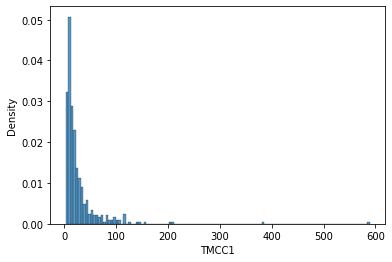

In [8]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

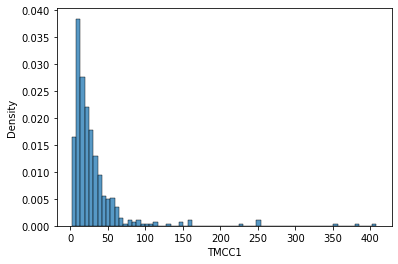

In [9]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

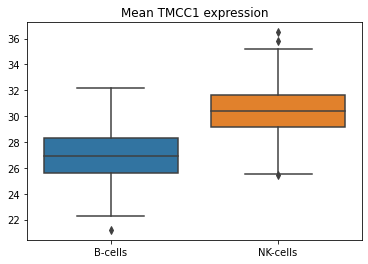

In [10]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    for n in range(n_samples):
        mean_expressions.append(expressions.sample(sample_size).mean())    
    return mean_expressions


sample_size = 250
n_samples = 1000

b_mean_expr = demonstrate_clt(b_cells_expression_data.TMCC1, sample_size, n_samples)
nk_mean_expr = demonstrate_clt(nk_cells_expression_data.TMCC1, sample_size, n_samples)

mean_expr_TMCC1 ={
    'B-cells': b_mean_expr,
    'NK-cells': nk_mean_expr
}

mean_expr_TMCC1 = [b_mean_expr, nk_mean_expr]

meanboxes = sns.boxplot(data=mean_expr_TMCC1)
meanboxes.set_title('Mean TMCC1 expression')
meanboxes.set_xticklabels(("B-cells", "NK-cells"));
plt.show()

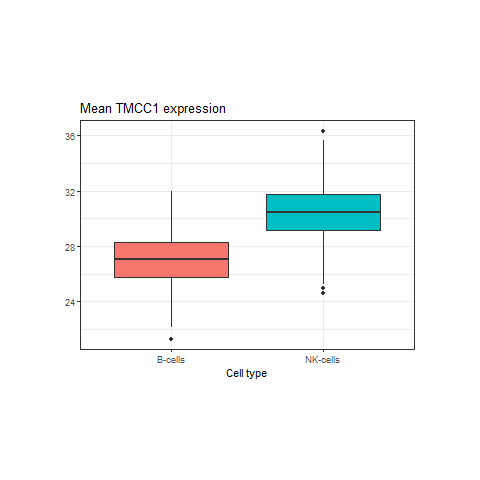

In [11]:
%%R -i b_cells_expression_data -i nk_cells_expression_data
library(ggplot2)

demonstrate_clt = function(expressions, sample_size, n_samples){
 mean_expressions = c()
for(i in 1:n_samples){
mean_expressions[length(mean_expressions)+1] = mean(expressions[sample(length(expressions), sample_size)]) 
}
return(mean_expressions)
}

sample_size = 250
n_samples = 1000

b_mean_expr = demonstrate_clt(b_cells_expression_data$TMCC1, sample_size, n_samples)
nk_mean_expr = demonstrate_clt(nk_cells_expression_data$TMCC1, sample_size, n_samples)
mean_expr_tmcc1 = as.data.frame(rbind(cbind(b_mean_expr, 'B-cells'), cbind(nk_mean_expr, 'NK-cells')))
colnames(mean_expr_tmcc1) = c('mean', 'cell')
mean_expr_tmcc1$mean = as.numeric(mean_expr_tmcc1$mean)
# c('Mean TMCC1 expression', 'Cell type')

pl = ggplot(data = mean_expr_tmcc1, aes(x = cell, y=mean, fill = cell)) + geom_boxplot() +
        theme_bw() + labs(title = "Mean TMCC1 expression", x = "Cell type") +
        theme(legend.position="none", axis.title.y=element_blank())

print(pl, vp=grid::viewport(width=unit(5, 'inch'), height=unit(4, 'inch')))

Что интересно, видно, что  рассчет усов и выбросов немного отличаются у базовых боксплотов в Python и R.

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [12]:
def calculate_ci(sample, std=None):
    if std is None:
        std = sample.std()
    
    mean = sample.mean()
    se = std / np.sqrt(len(sample))
    left_b = mean - 1.96 * se
    right_b = mean + 1.96 * se

    return (left_b, right_b)

b_cells_int = calculate_ci(b_cells_expression_data.TMCC1)
nk_cells_int = calculate_ci(nk_cells_expression_data.TMCC1)
print(f'CI for B-cells: {b_cells_int}')
print(f'CI for NK-cells: {nk_cells_int}')

CI for B-cells: (23.42883838285794, 30.529105275542065)
CI for NK-cells: (26.854734824710704, 34.00790437608929)


## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [13]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [14]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

C:\Users\vauli\AppData\Local\Temp\ipykernel_20972\757604766.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, # 95% доверительный интервал


(23.420272072079296, 30.53767158632071)

In [15]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

C:\Users\vauli\AppData\Local\Temp\ipykernel_20972\2133334576.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, # 95% доверительный интервал


(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [16]:
def check_intervals_intersect(intervals):  
    first_ci = intervals[0]
    second_ci = intervals[1]    
    return  not ((first_ci[1] <= second_ci[0]) or (second_ci[1] <= first_ci[0])) 
# Здесь важно учесть что включение в себя одного интервала другим тоже считаем за сопротивление

check_intervals_intersect([b_cells_int, nk_cells_int])

True

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [17]:
def table_ci_and_preproc(table, celltype):
    table = table.iloc[:, :-1].apply(calculate_ci, axis = 0).transpose()
    table[f'{celltype}_interval'] = list(zip(table[0], table[1]))
    table.drop([0,1], axis = 1, inplace = True)
    return table

def check_dge_with_ci(first_table, second_table, celltypes = ["B", "NK"]):
    first_table = table_ci_and_preproc(first_table, celltypes[0])
    second_table = table_ci_and_preproc(second_table, celltypes[1])
    intervals = pd.concat([first_table, second_table], axis = 1)
        
    ci_test_results = intervals.apply(check_intervals_intersect, axis = 1)
#     ci_test_results = np.concatenate([genes, ci_test_results])
    return ci_test_results, intervals

dge_with_ci_results, ci_intervals = check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data)

In [18]:
ci_counts = dge_with_ci_results.value_counts()
print(f'There are {ci_counts[True]} overlapping ang {ci_counts[False]} non-overlapping intervals')
print('\nFor example (do intervals overlap?):\n')
print(dge_with_ci_results.head(2))
ci_intervals.head(2)

There are 14980 overlapping ang 3812 non-overlapping intervals

For example (do intervals overlap?):

TMCC1      True
RANBP3    False
dtype: bool


,B_interval,NK_interval
TMCC1,"(23.42883838285794, 30.529105275542065)","(26.854734824710704, 34.00790437608929)"
RANBP3,"(40.6696462840744, 43.64426926392558)","(45.83041023581657, 51.43146725018342)"


## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [19]:
from statsmodels.stats.weightstats import ztest

In [20]:
# Наш излюбленный ген
z_tmcc1 = ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)
compare = 'greather' if z_tmcc1[1] > 0.05 else 'lower'
print(f'Z-score is {z_tmcc1[0]}, with p-value {z_tmcc1[1]} which is {compare} then 0.05')

Z-score is -1.3427434041885127, with p-value 0.17935507499860204 which is greather then 0.05


Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [21]:
def table_z_preproc(table, celltype):
    table = table.iloc[:, :-1].transpose()
    table[f'{celltype}_values']= table.values.tolist()
    table.drop(list(range(0,500)), axis = 1, inplace = True)
    return table

def check_dge_with_ztest(first_table, second_table, celltypes = ["B", "NK"]):
    first_table = table_z_preproc(first_table, celltypes[0])
    second_table = table_z_preproc(second_table, celltypes[1])
    dge_ztest = pd.concat([first_table, second_table], axis = 1)
    z_test_results = dge_ztest.apply(lambda row: ztest(row.B_values, row.NK_values), axis=1)
    dge_ztest[['z_score','p_value']] = pd.DataFrame(z_test_results.tolist(), index= z_test_results.index)
    dge_ztest.drop(['B_values', 'NK_values'], axis = 1, inplace = True)
    dge_ztest['Significant_differences'] = dge_ztest['p_value'] < 0.05
    return dge_ztest

check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

,z_score,p_value,Significant_differences
TMCC1,-1.342743,0.179355,False
RANBP3,-4.001615,0.000063,True
GABRG3,0.379114,0.704603,False
ARRDC5,-2.414566,0.015754,True
LRP3,1.686146,0.091768,False
...,...,...,...
C1orf100,0.064037,0.948941,False
WDR75,2.225673,0.026036,True
ZBTB26,0.902314,0.366890,False
SPTY2D1,-1.577860,0.114598,False


## Реализуем те же задания на R

In [22]:
%%R -i b_cells_expression_data -i nk_cells_expression_data
# Все выполняется в одной ячейке чтобы меньше тратить времени на запуск R, перекодировку и импорт данных
library(dplyr)
library(BSDA)

# Вычисление доверительного интервала
print('Self-build function:')
calculate_ci_r = function(sample, std=0){
    if(std == 0){
        std = sd(sample)
        }    
    m = mean(sample)
    se = std / sqrt(length(sample))
    left_b = m - 1.96 * se
    right_b = m + 1.96 * se
    return(c(left_b, right_b))
}

b_cells_int = calculate_ci_r(b_cells_expression_data$TMCC1)
nk_cells_int = calculate_ci_r(nk_cells_expression_data$TMCC1)
print(paste0('CI for B-cells: (', paste0(b_cells_int, collapse=", "), ")"))
print(paste0('CI for NK-cells: (', paste0(nk_cells_int, collapse=", "), ")"))

# Вычисление доверительного интервала   через встроенные функции:
cat('\nConfit function\n')
l.model <- lm(TMCC1 ~ 1, b_cells_expression_data)
b_cells_int = confint(l.model, level=0.95)
l.model <- lm(TMCC1 ~ 1, nk_cells_expression_data)
nk_cells_int = confint(l.model, level=0.95)
print(paste0('CI for B-cells: (', paste0(b_cells_int, collapse=", "), ")"))
print(paste0('CI for NK-cells: (', paste0(nk_cells_int, collapse=", "), ")"))

# Проверка интервалов на пересечение:
check_intervals_intersect_r = function(first_ci, second_ci){
  return(!((first_ci[2] <= second_ci[1]) || (second_ci[2] <= first_ci[1])))
}

cat('\nDo CIs for TMCC1 B- and NK-cells  intersects?')
print(check_intervals_intersect_r(first_ci = b_cells_int, second_ci = nk_cells_int))
print("")

# Проверка всех генов:
table_ci_and_preproc_r = function(df){
  df = lapply(df, FUN = calculate_ci_r)
  df = as.data.frame(df)
  return(df)
}


check_intervals_intersect_r_sep = function(borders){
  first_ci_1 = borders[1]
  first_ci_2 = borders[2]
  second_ci_1 = borders[3]
  second_ci_2 = borders[4]
  return(!((first_ci_2 <= second_ci_1) || (second_ci_2 <= first_ci_1)))
}

check_dge_with_ci_r = function(first_table, second_table){
  first_table = table_ci_and_preproc_r(first_table)
  second_table = table_ci_and_preproc_r(second_table)
  intervals = rbind(first_table, second_table)
  ci_test_results = lapply(intervals, check_intervals_intersect_r_sep)
  ci_test_results = t(as.data.frame(ci_test_results))
  colnames(ci_test_results) = 'CI_intersects'
  return(ci_test_results)
}

print(head(check_dge_with_ci_r(b_cells_expression_data, nk_cells_expression_data)))

# Сравнение Z-тестом
z_tmcc1_r = z.test(
  x = b_cells_expression_data$TMCC1,
  y = nk_cells_expression_data$TMCC1,
  sigma.x = sd(b_cells_expression_data$TMCC1),
  sigma.y = sd(nk_cells_expression_data$TMCC1)
)

print(z_tmcc1_r)

# Сравнение всех генов Z-тестом:
check_dge_with_ztest_r = function(first_table, second_table){
  results = data.frame()
  first_table = t(first_table)
  second_table = t(second_table)
  for(gene in colnames(b_cells_expression_data)){
    nk_gene = nk_cells_expression_data[,gene]
    b_gene = b_cells_expression_data[,gene]
    sd_1 = sd(b_gene)
    sd_2 = sd(nk_gene)
    test = z.test(x = b_gene, y = nk_gene, sigma.x = sd_1, sigma.y = sd_2)
    n = nrow(results)+1
    results[n, 'gene'] = gene
    results[n, 'Signif_fiff'] = test$p.value < 0.005
  }
  return(results)
}

print(head(check_dge_with_ztest_r(b_cells_expression_data, nk_cells_expression_data)))

R[write to console]: 
Присоединяю пакет: 'dplyr'


R[write to console]: Следующие объекты скрыты от 'package:stats':

    filter, lag


R[write to console]: Следующие объекты скрыты от 'package:base':

    intersect, setdiff, setequal, union


R[write to console]: Загрузка требуемого пакета: lattice

R[write to console]: 
Присоединяю пакет: 'BSDA'


R[write to console]: Следующий объект скрыт от 'package:datasets':

    Orange




[1] "Self-build function:"
[1] "CI for B-cells: (23.4288383828579, 30.5291052755421)"
[1] "CI for NK-cells: (26.8547348247107, 34.0079043760893)"

Confit function
[1] "CI for B-cells: (23.4202720720792, 30.5376715863207)"
[1] "CI for NK-cells: (26.8461046880756, 34.0165345127244)"

Do CIs for TMCC1 B- and NK-cells  intersects?[1] TRUE
[1] ""
       CI_intersects
TMCC1           TRUE
RANBP3         FALSE
GABRG3          TRUE
ARRDC5         FALSE
LRP3            TRUE
TIMM23          TRUE

	Two-sample z-Test

data:  b_cells_expression_data$TMCC1 and nk_cells_expression_data$TMCC1
z = -1.3427, p-value = 0.1794
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.491641  1.586945
sample estimates:
mean of x mean of y 
 26.97897  30.43132 

    gene Signif_fiff
1  TMCC1       FALSE
2 RANBP3        TRUE
3 GABRG3       FALSE
4 ARRDC5       FALSE
5   LRP3       FALSE
6 TIMM23       FALSE


## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [23]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [24]:
# Сохраним таблицу в .csv файл
# results.to_csv("path_to_your_awesome_results.csv")

## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

<div>
<img src="./Pictures/Meeting.jpg" width="500">
</div>

Позвонил из лабы Даше Голофеевой